In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import json

In [2]:
# http://localhost:8001/getdataall
jsonData = req.get('http://localhost:8001/getdataall').json()
df = pd.DataFrame(jsonData)
df.head()

,dateTime,cm,inches
0,2023-05-08T08:16:25.000Z,9.66,3.80
1,2023-05-08T08:16:26.000Z,9.66,3.80
2,2023-05-08T08:16:27.000Z,9.25,3.64
3,2023-05-08T08:16:28.000Z,9.66,3.80
4,2023-05-08T08:16:29.000Z,9.25,3.64


In [4]:
# add another column driprate to the dataframe where driprate = (cm of next row - cm of current row) / (time of next row - time of current row) where sm is float and time is in format "	2023-05-08T08:16:25.000Z"
# Assuming your DataFrame is named 'df'
df['dateTime'] = pd.to_datetime(df['dateTime'])  # Convert 'dateTime' column to datetime type

# Sort the DataFrame by 'dateTime' column if it's not already sorted
df = df.sort_values('dateTime')

# Calculate the 'driprate' column
df['driprate'] = (df['cm'].shift(-1) - df['cm']) / (df['dateTime'].shift(-1) - df['dateTime']).dt.total_seconds()

# Display the updated DataFrame
print(df)


                      dateTime    cm  inches  driprate
0    2023-05-08 08:16:25+00:00  9.66    3.80     0.000
1    2023-05-08 08:16:26+00:00  9.66    3.80    -0.410
2    2023-05-08 08:16:27+00:00  9.25    3.64     0.410
3    2023-05-08 08:16:28+00:00  9.66    3.80    -0.410
4    2023-05-08 08:16:29+00:00  9.25    3.64     0.205
...                        ...   ...     ...       ...
2055 2023-05-09 01:05:48+00:00  0.00    0.00     0.000
2056 2023-05-09 01:05:50+00:00  0.00    0.00     0.000
2057 2023-05-09 01:06:58+00:00  0.00    0.00     0.000
2058 2023-05-09 01:07:00+00:00  0.00    0.00     0.000
2059 2023-05-09 01:07:02+00:00  0.00    0.00       NaN

[2060 rows x 4 columns]


In [8]:
# write df to csv
df.to_csv('data.csv', index=False)
df.dropna(inplace=True)


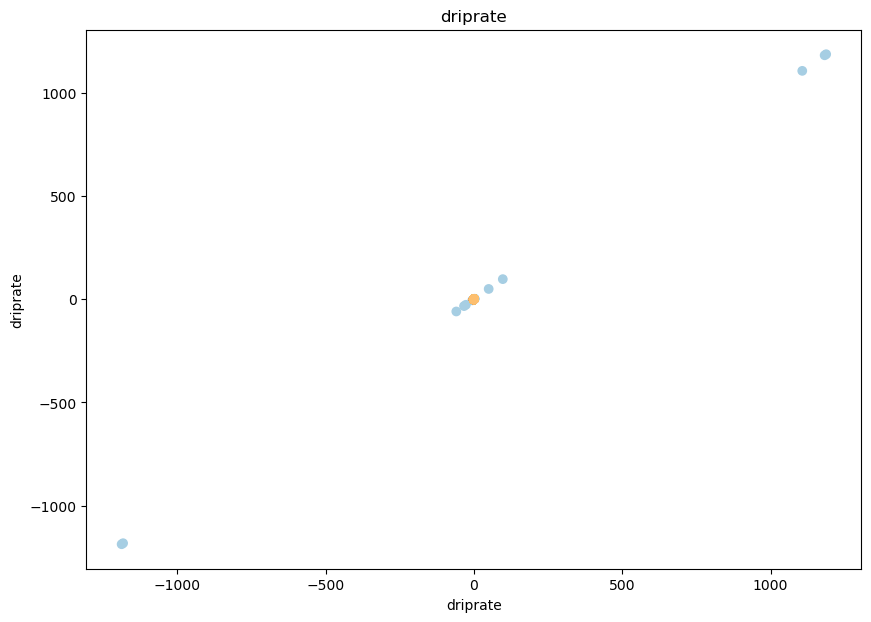

In [9]:
# detect anomalies in driprate column

x = df['driprate'].values
x = x.reshape(-1, 1)

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
    eps = .2,  # .2-.5
    metric="euclidean",
    min_samples = 5,
    n_jobs = -1)
clusters = outlier_detection.fit_predict(x)
list(clusters).count(-1)

# plot the driprate column
plt.figure(figsize=(10, 7))
plt.scatter(x[:,0], x[:,0], c=clusters, cmap='Paired')
plt.xlabel('driprate')
plt.ylabel('driprate')
plt.title('driprate')
plt.show()

    

In [14]:
def predict_anomaly(driprate_value):
    driprate_value = np.array([[driprate_value]])
    is_anomaly = -1 in outlier_detection.labels_
    return is_anomaly

In [19]:
# in range 0 to 10 with step 0.1
for i in range(0, 100, 1):

    print(i/10, predict_anomaly(0.205))
    

0.0 True
0.1 True
0.2 True
0.3 True
0.4 True
0.5 True
0.6 True
0.7 True
0.8 True
0.9 True
1.0 True
1.1 True
1.2 True
1.3 True
1.4 True
1.5 True
1.6 True
1.7 True
1.8 True
1.9 True
2.0 True
2.1 True
2.2 True
2.3 True
2.4 True
2.5 True
2.6 True
2.7 True
2.8 True
2.9 True
3.0 True
3.1 True
3.2 True
3.3 True
3.4 True
3.5 True
3.6 True
3.7 True
3.8 True
3.9 True
4.0 True
4.1 True
4.2 True
4.3 True
4.4 True
4.5 True
4.6 True
4.7 True
4.8 True
4.9 True
5.0 True
5.1 True
5.2 True
5.3 True
5.4 True
5.5 True
5.6 True
5.7 True
5.8 True
5.9 True
6.0 True
6.1 True
6.2 True
6.3 True
6.4 True
6.5 True
6.6 True
6.7 True
6.8 True
6.9 True
7.0 True
7.1 True
7.2 True
7.3 True
7.4 True
7.5 True
7.6 True
7.7 True
7.8 True
7.9 True
8.0 True
8.1 True
8.2 True
8.3 True
8.4 True
8.5 True
8.6 True
8.7 True
8.8 True
8.9 True
9.0 True
9.1 True
9.2 True
9.3 True
9.4 True
9.5 True
9.6 True
9.7 True
9.8 True
9.9 True


# time prediction